# An exciting journey exploring the Python code for IMDB Rating Analysis using a Kaggle dataset!

##Importing Necessary Libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Loading the DataSet

In [ ]:
# Using the URL of the Raw File from GitHub
url = 'https://raw.githubusercontent.com/iamrahulhere/CVIP-IMDB-Data-Analysis/main/IMDB-Movie-Data.csv'

In [ ]:
imdbdata = pd.read_csv(url)

In [ ]:
imdbdata.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


##DataSet Info

In [ ]:
imdbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [32]:
print("Shape of the dataset:", imdbdata.shape)
print("Columns in the dataset:", imdbdata.columns)

Shape of the dataset: (1000, 12)
Columns in the dataset: Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore'],
      dtype='object')


In [ ]:
#DataTypes Used in the DataSet
imdbdata.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [33]:
# Just Some Details We can obtain from the DataSet
print("Number of movies:", len(imdbdata))

print("Highest rated movie:", imdbdata.loc[imdbdata['Rating'].idxmax(), 'Title'])


Number of movies: 1000
Highest rated movie: The Dark Knight


##Genre Analysis

In [34]:
imdbdata["Genre"].value_counts()

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 207, dtype: int64

Text(0.5, 1.0, 'Movies by Genres')

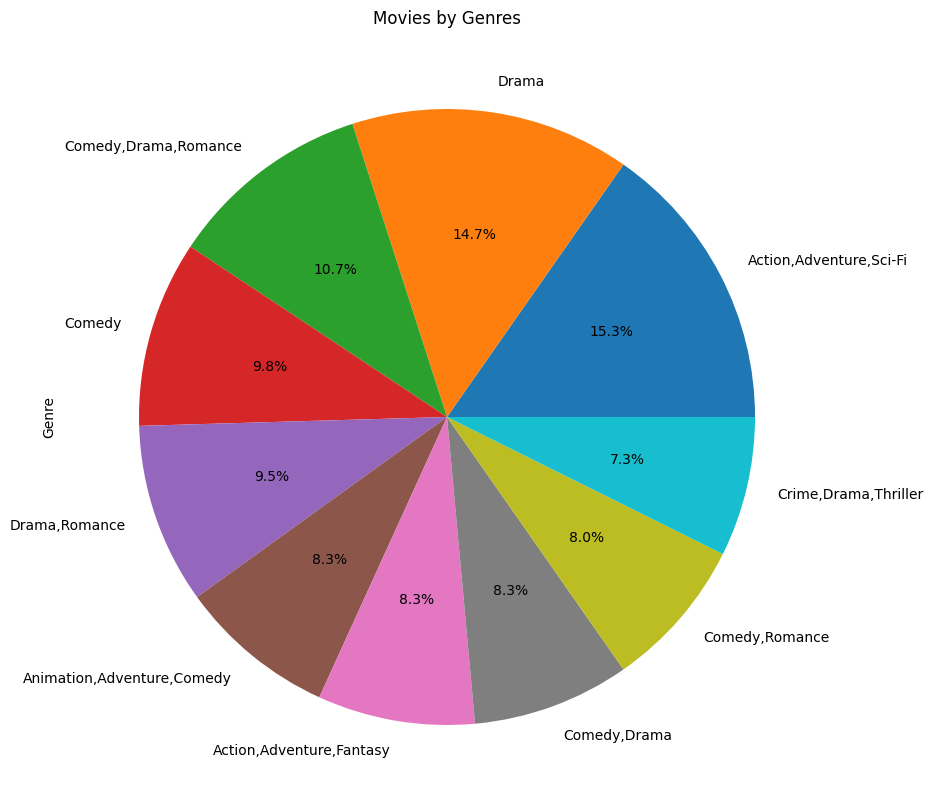

In [ ]:
imdbdata.Genre.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('Movies by Genres')

In [ ]:
# Number of Movies by Genre
seperate_genre='Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Fantasy','Family','History','Horror','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War','Western'
print("No. of Movies   |    Genre")
print("---------------------------")
for genre in seperate_genre:
    df = imdbdata['Genre'].str.contains(genre).fillna(False)
    # print('The total number of movies with',genre,'=',len(imdbdata[df]))
    print('   ',len(imdbdata[df]),'     |     ',genre)

No. of Movies   |    Genre
---------------------------
    303      |      Action
    259      |      Adventure
    49      |      Animation
    81      |      Biography
    279      |      Comedy
    150      |      Crime
    513      |      Drama
    101      |      Fantasy
    51      |      Family
    29      |      History
    119      |      Horror
    21      |      Music
    5      |      Musical
    106      |      Mystery
    141      |      Romance
    120      |      Sci-Fi
    18      |      Sport
    195      |      Thriller
    13      |      War
    7      |      Western


##Director Analysis

Text(0.5, 1.0, 'TOP 10 DIRECTORS')

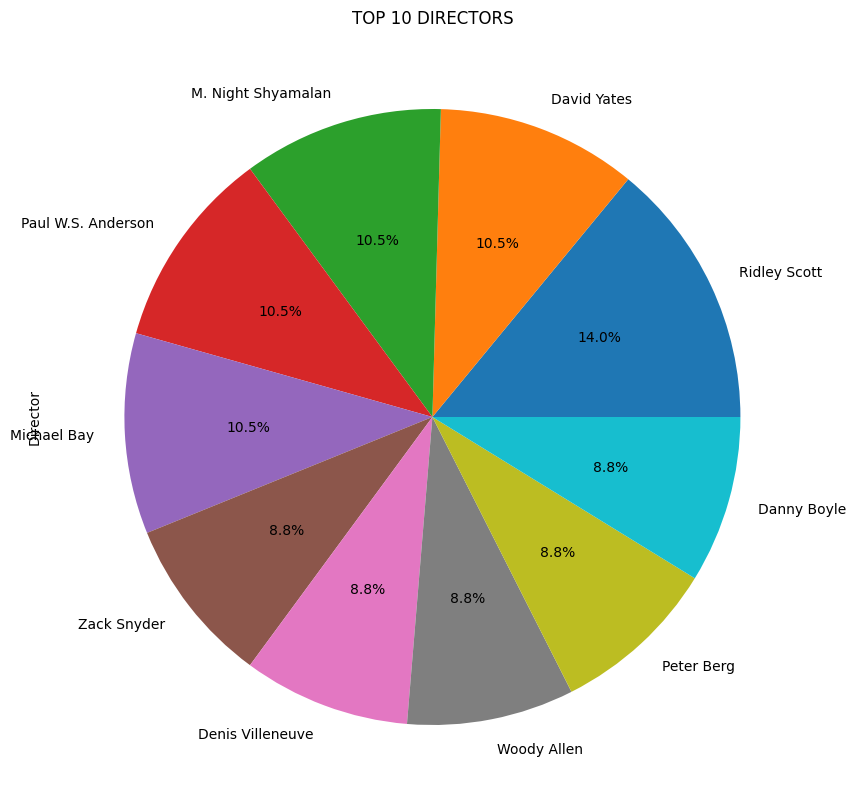

In [ ]:
imdbdata.Director.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('TOP 10 DIRECTORS')

##Actor Analysis

In [43]:
top_actors = imdbdata['Actors'].value_counts().head(10)
print("Top Actors:\n", top_actors)

Top Actors:
 Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson     2
Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon             2
Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson                    2
Gerard Butler, Aaron Eckhart, Morgan Freeman,Angela Bassett             2
Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana                    1
Ethan Hawke, David Thewlis, Emma Watson,Dale Dickey                     1
Leonardo DiCaprio, Djimon Hounsou, Jennifer Connelly, Kagiso Kuypers    1
Mark Wahlberg, Dwayne Johnson, Anthony Mackie,Tony Shalhoub             1
Mark Wahlberg, Seth MacFarlane, Amanda Seyfried, Jessica Barth          1
Isabelle Huppert, André Marcon, Roman Kolinka,Edith Scob                1
Name: Actors, dtype: int64


Text(0.5, 1.0, 'TOP ACTORS')

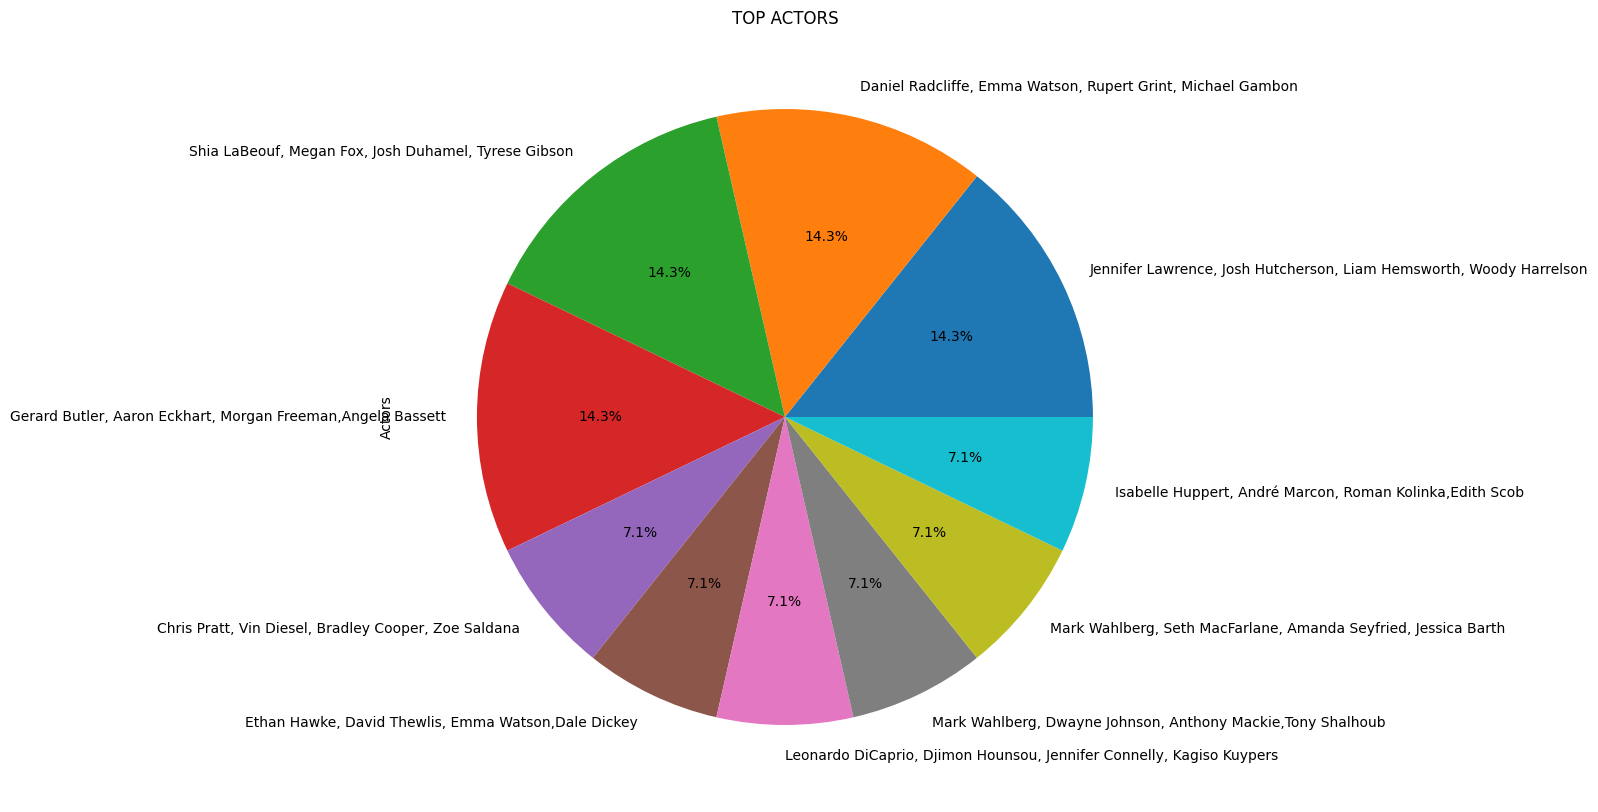

In [42]:
imdbdata.Actors.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('TOP ACTORS')

##Year Analysis

In [ ]:
print('YEAR   No. of Movies')
imdbdata["Year"].value_counts()

YEAR   No. of Movies


2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

## Rating Analysis

In [51]:
ratings = imdbdata['Rating'].value_counts()
print("Ratings  No. of Movies\n", ratings)

Ratings  No. of Movies
 7.1    52
6.7    48
7.0    46
6.3    44
7.3    42
7.2    42
6.6    42
6.5    40
7.8    40
6.2    37
6.8    37
7.5    35
6.4    35
7.4    33
6.1    31
6.9    31
7.6    27
7.7    27
5.8    26
6.0    26
8.1    26
7.9    23
5.7    21
5.9    19
8.0    19
5.6    17
5.5    14
5.4    12
5.3    12
5.2    11
8.2    10
4.9     7
8.3     7
8.5     6
4.7     6
4.6     5
5.1     5
4.3     4
5.0     4
8.4     4
4.8     4
3.9     3
8.6     3
4.2     2
3.5     2
2.7     2
8.8     2
3.7     2
4.1     1
9.0     1
4.0     1
3.2     1
4.5     1
1.9     1
4.4     1
Name: Rating, dtype: int64


###Top 10 Highest Rated Movies

In [ ]:
#top 10 rating movies

Sortedrating= imdbdata.sort_values(['Rating'], ascending=False)
Sortedrating.head(10)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0
133,134,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


## Revenue Analysis

In [60]:
revenue = imdbdata['Revenue_Millions'].value_counts()
print("Revenue  No. of Movies\n", revenue)

Revenue  No. of Movies
 0.03      7
0.01      5
0.05      4
0.32      4
0.02      4
         ..
209.81    1
65.27     1
5.69      1
37.55     1
19.64     1
Name: Revenue_Millions, Length: 814, dtype: int64


### Top 10 Movies by Revenue

In [61]:
Sortedrating= imdbdata.sort_values(['Revenue_Millions'], ascending=False)
Sortedrating.head(10)


Top 10 Movies by Revenue


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
119,120,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,486.29,77.0
94,95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
578,579,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Katniss Everdeen and Peeta Mellark become targ...,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146,7.6,525646,424.65,76.0
